## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [2]:
data = pd.read_csv('market_basket.csv', sep = ';')
data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_11292\1844469905.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('market_basket.csv', sep = ';')


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


## Data Preprocessing

In [3]:
data = data.dropna(subset = "Itemname")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 520609 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      520609 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    520609 non-null  int64  
 3   Date        520609 non-null  object 
 4   Price       520609 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     520609 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 31.8+ MB


In [5]:
data.drop(["CustomerID"], axis = 1, inplace = True)

#### Irrelevant BillNo (having debt)

In [6]:
def del_string(val):
    try:
        int(val)
        return True
    except:
        return False

In [7]:
data[~data["BillNo"].apply(del_string)]

,BillNo,Itemname,Quantity,Date,Price,Country
288772,A563185,Adjust bad debt,1,12.08.2011 14:50,"11062,06",United Kingdom
288773,A563186,Adjust bad debt,1,12.08.2011 14:51,"-11062,06",United Kingdom
288774,A563187,Adjust bad debt,1,12.08.2011 14:52,"-11062,06",United Kingdom


In [8]:
data = data[data["BillNo"].apply(del_string)]
data.head()

,BillNo,Itemname,Quantity,Date,Price,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",United Kingdom


### Removing damaged/misleading items (Itemnames which are not in Uppercase is inaccurate)

In [9]:
def del_wrong_items(item):
    if item.isupper() :
        return True
    return False

In [10]:
data = data[data["Itemname"].apply(del_wrong_items)]

### Fixing price format

In [11]:
data["Price"] = data["Price"].apply(lambda x : x.replace(',', '.'))
data.Price = data["Price"].astype(float)

### Fixing date-time format

In [12]:
data["Date"] = data["Date"].apply(pd.Timestamp)

In [13]:
data.head()

,BillNo,Itemname,Quantity,Date,Price,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,United Kingdom


## EDA

### Item frequencies

In [14]:
item_freq = data.pivot_table(index = "Itemname", values = 'Quantity', aggfunc = np.sum)

In [15]:
item_freq.head(2)

,Quantity
Itemname,
10 COLOUR SPACEBOY PEN,6300
12 COLOURED PARTY BALLOONS,2095


In [16]:
max_20 = item_freq.nlargest(columns = "Quantity", n = 20)

In [17]:
max_20 = max_20.reset_index()

#### Visualize Item frequencies

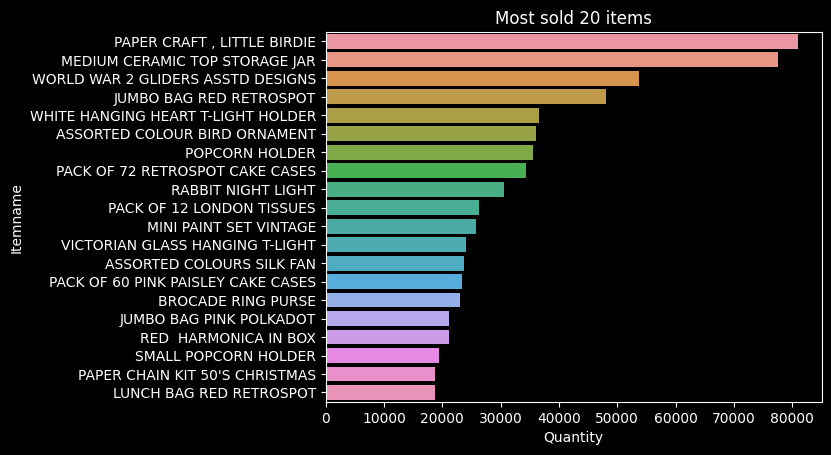

In [18]:
plt.style.use('dark_background')
sns.barplot(y = "Itemname", x = "Quantity", data = max_20)
plt.title("Most sold 20 items")
plt.show()

### Top Countries

In [19]:
top_20_countries = data["Country"].value_counts().nlargest(20)

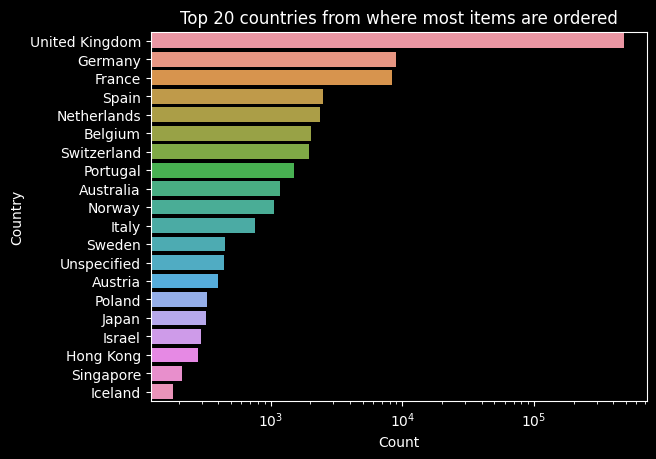

In [20]:
sns.barplot(y = top_20_countries.index, x = top_20_countries.values)
plt.xscale('log')
plt.title("Top 20 countries from where most items are ordered")
plt.xlabel("Count")
plt.show()

### Prices

In [21]:
data["Total_price"] = data["Quantity"] * data["Price"]

In [22]:
prices = data.pivot_table(index = "Itemname", values = "Total_price", aggfunc = np.sum)
prices.reset_index(inplace = True)

In [23]:
top_20_prices = prices.nlargest(columns = "Total_price", n = 20)

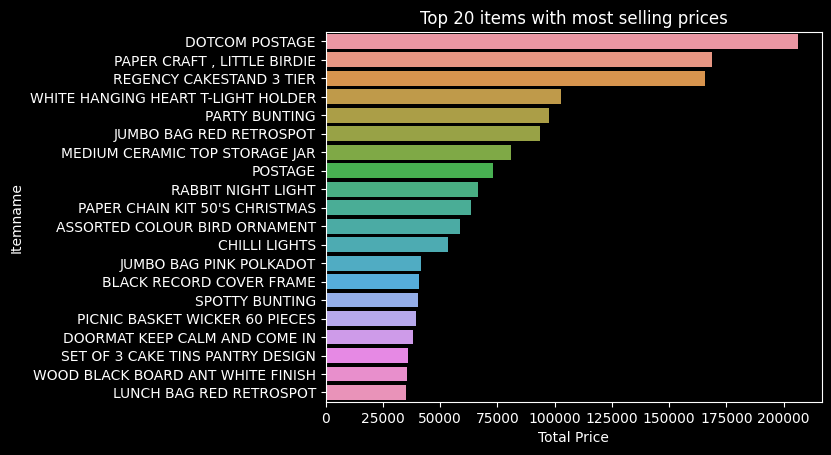

In [24]:
sns.barplot(y = "Itemname", x = "Total_price", data = top_20_prices)
plt.title("Top 20 items with most selling prices")
plt.xlabel("Total Price")
plt.show()

### Date and Time

In [25]:
data["Only_date"] = data["Date"].dt.date

In [26]:
sell_date = data.pivot_table(index = "Only_date", values = "Quantity", aggfunc = np.sum)
sell_date.reset_index(inplace = True)

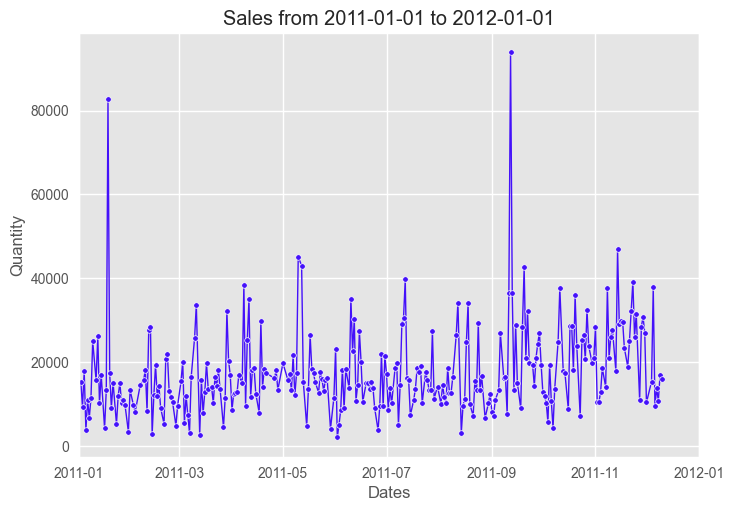

In [37]:
plt.style.use('ggplot')
sns.lineplot(x = "Only_date", y = "Quantity", data = sell_date, linewidth = 1, marker = 'o', markersize = 4, markeredgewidth = 0.5, c = '#4411fa')
plt.xlim([pd.Timestamp("2011-01-01"), pd.Timestamp("2012-01-01")])
plt.xlabel("Dates")
plt.title("Sales from 2011-01-01 to 2012-01-01")
plt.show()

## Apriori Analysis

In [28]:
data = data[["BillNo", "Itemname"]]
data["Itemname"] = data["Itemname"].str.title()

### Transaction list

In [29]:
transaction_df = data.groupby("BillNo")["Itemname"].apply(list).apply(set).apply(list)
transaction_df

BillNo
536365    [White Hanging Heart T-Light Holder, Knitted U...
536366    [Hand Warmer Union Jack, Hand Warmer Red Polka...
536367    [Ivory Knitted Mug Cosy, Box Of 6 Assorted Col...
536368    [Yellow Coat Rack Paris Fashion, Jam Making Se...
536369                           [Bath Building Block Word]
                                ...                        
572054    [Picnic Boxes Set Of 3 Retrospot, Set Of 6 Rib...
572055    [Set 3 Retrospot Tea,Coffee,Sugar, Set Of 4 Po...
572056                                            [Postage]
572057    [Feather Pen,Hot Pink, Tea Time Oven Glove, Mi...
572058    [Vintage Union Jack Bunting, Set/10 Blue Polka...
Name: Itemname, Length: 19463, dtype: object

In [30]:
transaction_df[536365]

['White Hanging Heart T-Light Holder',
 'Knitted Union Flag Hot Water Bottle',
 'Red Woolly Hottie White Heart.',
 'Glass Star Frosted T-Light Holder',
 'Cream Cupid Hearts Coat Hanger',
 'White Metal Lantern',
 'Set 7 Babushka Nesting Boxes']

In [31]:
transactions = transaction_df.values
transactions[:5]

array([list(['White Hanging Heart T-Light Holder', 'Knitted Union Flag Hot Water Bottle', 'Red Woolly Hottie White Heart.', 'Glass Star Frosted T-Light Holder', 'Cream Cupid Hearts Coat Hanger', 'White Metal Lantern', 'Set 7 Babushka Nesting Boxes']),
       list(['Hand Warmer Union Jack', 'Hand Warmer Red Polka Dot']),
       list(['Ivory Knitted Mug Cosy', 'Box Of 6 Assorted Colour Teaspoons', "Poppy'S Playhouse Bedroom", 'Recipe Box With Metal Heart', "Poppy'S Playhouse Kitchen", 'Feltcraft Princess Charlotte Doll', 'Love Building Block Word', 'Box Of Vintage Jigsaw Blocks', 'Assorted Colour Bird Ornament', 'Doormat New England', 'Home Building Block Word', 'Box Of Vintage Alphabet Blocks']),
       list(['Yellow Coat Rack Paris Fashion', 'Jam Making Set With Jars', 'Blue Coat Rack Paris Fashion', 'Red Coat Rack Paris Fashion']),
       list(['Bath Building Block Word'])], dtype=object)

In [50]:
rules = apriori(transactions = transactions, min_support = 0.028, min_confidence = 0.05, min_lift = 3)
rules = list(rules)

In [51]:
associations = []
temp = []
for rule in rules:
    temp = []
    temp.append(list(rule[0])[0])
    temp.append(list(rule[0])[1])
    temp.append(rule[1])
    temp.append(list(rule[2][0])[2])
    temp.append(list(rule[2][0])[3])
    associations.append(temp)


## Associated Items

In [52]:
pd.DataFrame(associations, columns = ["Product 1", "Product 2", "Support", "Confidence", "Lift"])

,Product 1,Product 2,Support,Confidence,Lift
0,Alarm Clock Bakelike Red,Alarm Clock Bakelike Green,0.032523,0.654602,12.405566
1,Green Regency Teacup And Saucer,Pink Regency Teacup And Saucer,0.031085,0.620513,16.409023
2,Green Regency Teacup And Saucer,Roses Regency Teacup And Saucer,0.037558,0.749744,14.404995
3,Jumbo Bag Baroque Black White,Jumbo Bag Red Retrospot,0.029800,0.627027,5.912707
4,Jumbo Bag Red Retrospot,Jumbo Bag Pink Polkadot,0.042080,0.676301,6.377344
5,Jumbo Bag Red Retrospot,Jumbo Shopper Vintage Red Paisley,0.034733,0.327519,5.466989
6,Jumbo Bag Red Retrospot,Jumbo Storage Bag Suki,0.037045,0.349322,5.771518
7,Jumbo Bag Red Retrospot,Lunch Bag Red Retrospot,0.029440,0.277616,3.506324
8,Lunch Bag Black Skull.,Lunch Bag Red Retrospot,0.032472,0.501587,6.335103
9,Lunch Bag Cars Blue,Lunch Bag Red Retrospot,0.028002,0.481449,6.080751


## From the above table, it is clear that - 
#### `Jumbo Bag Red Retrospot` is associated with `Jumbo Shopper Vintage Red Paisley`
#### `Alarm Clock Bakelike Red` is associated with `Alarm Clock Bakelike Green`
#### `Jumbo Bag Baroque Black White	` is associated with `Jumbo Bag Red Retrospot`
#### and etc.